In [2]:
import torch
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, "../../SemanticStyleGAN")
from utils.control import Control
import torch
import clip
from PIL import Image

/misc/usrhomes/g013/SemanticStyleGAN/notebooks/../../SemanticStyleGAN/models/op


ImportError: /misc/no_backups/g013/.cache/torch_extensions/py39_cpu/fused/fused.so: cannot open shared object file: No such file or directory

#### Messing around with clip

In [2]:

device = "cpu"
ckpt="/no_backups/g013/checkpoints/SSG_v3.13/ckpt/140000.pt"
control = Control(ckpt,device)

In [4]:
##Best 2 models should be either RN50x64, or L/14@336px
clip.available_models()
model,preprocess=clip.load("ViT-B/16",device="cpu",jit=False)


In [15]:
##Seventh does not contain any cars while third contains a lot of cars
image_names = ["first_img","second_img","third_img","fourth_img","fifth_img","sixth_img","seventh_img"]
preprocessed_images=[preprocess(Image.open(f"../results/saved_samples/{x}.png")).unsqueeze(0).to(device) for x in image_names]
#prompts = ["Car","cars", "a lot of cars", "few cars","no cars","road", "high number of cars","low number of cars"]
prompts=["A street with only one car","A street with a large number of cars ","A completely empty street","A street with some trees on the left side"]
text = clip.tokenize(prompts).to(device)

For image first_img


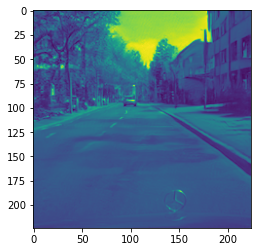

A street with only one car: 0.21%, A street with a large number of cars : 0.32%, A completely empty street: 0.07%, A street with some trees on the left side: 0.40%, 
For image second_img


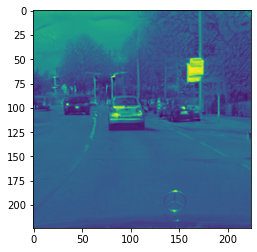

A street with only one car: 0.28%, A street with a large number of cars : 0.61%, A completely empty street: 0.04%, A street with some trees on the left side: 0.06%, 
For image third_img


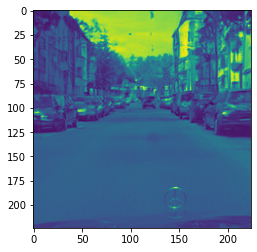

A street with only one car: 0.23%, A street with a large number of cars : 0.66%, A completely empty street: 0.03%, A street with some trees on the left side: 0.08%, 
For image fourth_img


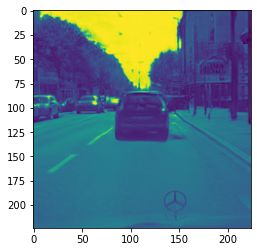

A street with only one car: 0.38%, A street with a large number of cars : 0.53%, A completely empty street: 0.06%, A street with some trees on the left side: 0.04%, 
For image fifth_img


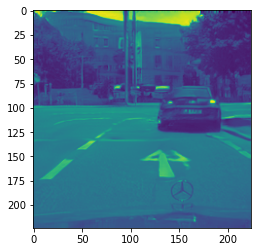

A street with only one car: 0.34%, A street with a large number of cars : 0.44%, A completely empty street: 0.04%, A street with some trees on the left side: 0.18%, 
For image sixth_img


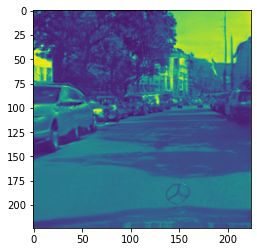

A street with only one car: 0.12%, A street with a large number of cars : 0.84%, A completely empty street: 0.00%, A street with some trees on the left side: 0.03%, 
For image seventh_img


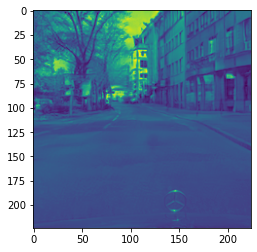

A street with only one car: 0.24%, A street with a large number of cars : 0.32%, A completely empty street: 0.17%, A street with some trees on the left side: 0.27%, 


In [17]:
probs=[]

## Results with ViT-B/16

## Calculating probability
with torch.no_grad():
    for preprocessed_image in preprocessed_images:
     logits_per_image, logits_per_text = model(preprocessed_image, text)
     prob = logits_per_image.softmax(dim=-1).cpu().numpy()
     probs.append(prob[0])


##Displaying images alongside probability 
for i,preporcessed_img in enumerate(preprocessed_images):
    print(f"For image {image_names[i]}")
    plt.imshow(preporcessed_img[0].numpy()[0])
    plt.show()
    prob= probs[i]
    acc_string =""
    for j,prompt in enumerate(prompts):
      acc_string+=f"{prompt}: {prob[j]:0.2f}%, "
    print(acc_string)


<!-- #### There are some inconsitencies that I think could be a problem if CLIP in it's current state was used to discover directions for Cityscapes:

1. For the prompt "no cars": It is expected for image 7 to have the highest prob (RV: 9.6%). while in reality the fourth image with a relatively high car dist has the second highest prob of value : 18%, while the highest prob is 19% for image 1 with 1 car .
2. Similar behavior witnessed with the prompt "low number of cars" as image 7 or 1 is expected to have a high value(but they got 20% and 15% respectively), but  image 6 had the highest value (46%).
3. For "Car" prompt: Image 7 with no "cars" had a probability of 30% while Image 6 with a lot of cars got the prob of 1%

Although on the good side. 
4. For the prompt "High number of cars": Image 6 got the highest probability of 30% compared to Img 7 (9%), Img 1(6.7%) . On average the images of high dist of cars got a higher prob than lower dist images : (Img 6 : 31%, Img3 : 20%, Img2 : 18% VS Img1 : 6.7%, Img7 : 9%) -->

In [15]:
##Best 2 models should be either RN50x64, or L/14@336px
clip.available_models()
model,preprocess=clip.load("ViT-L/14@336px",device="cpu",jit=False)


In [16]:
##Seventh does not contain any cars while third contains a lot of cars
image_names = ["first_img","second_img","third_img","fourth_img","fifth_img","sixth_img","seventh_img"]
preprocessed_images=[preprocess(Image.open(f"../results/saved_samples/{x}.png")).unsqueeze(0).to(device) for x in image_names]
prompts = ["Car","cars", "a lot of cars", "few cars","no cars","high number of cars", "low number of cars"]
text = clip.tokenize(prompts).to(device)

For image first_img


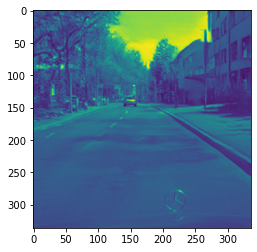

Car: 33.91%, cars: 3.00%, a lot of cars: 2.21%, few cars: 3.25%, no cars: 36.07%, high number of cars: 2.64%, low number of cars: 18.92%, 
For image second_img


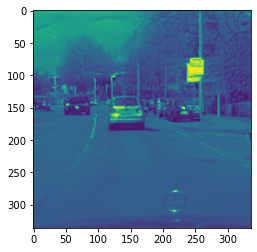

Car: 53.51%, cars: 2.15%, a lot of cars: 10.34%, few cars: 3.71%, no cars: 10.84%, high number of cars: 5.71%, low number of cars: 13.73%, 
For image third_img


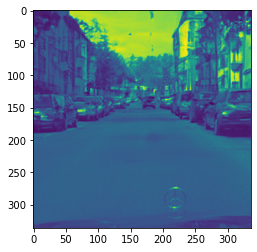

Car: 33.44%, cars: 3.68%, a lot of cars: 8.59%, few cars: 5.74%, no cars: 18.50%, high number of cars: 6.22%, low number of cars: 23.82%, 
For image fourth_img


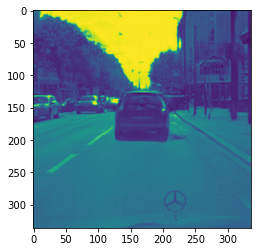

Car: 35.35%, cars: 2.78%, a lot of cars: 8.53%, few cars: 4.79%, no cars: 18.61%, high number of cars: 9.97%, low number of cars: 19.97%, 
For image fifth_img


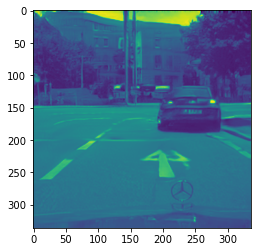

Car: 42.37%, cars: 4.57%, a lot of cars: 6.03%, few cars: 3.05%, no cars: 22.60%, high number of cars: 4.67%, low number of cars: 16.71%, 
For image sixth_img


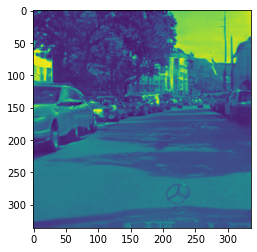

Car: 20.21%, cars: 6.28%, a lot of cars: 14.51%, few cars: 7.93%, no cars: 8.83%, high number of cars: 11.87%, low number of cars: 30.37%, 
For image seventh_img


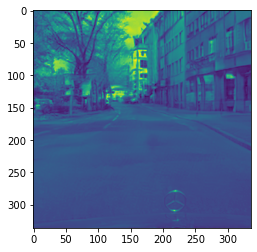

Car: 30.73%, cars: 3.36%, a lot of cars: 5.22%, few cars: 8.18%, no cars: 21.70%, high number of cars: 6.85%, low number of cars: 23.97%, 


In [17]:
probs=[]

## Results with ViT-L/14@336px

## Calculating probability
with torch.no_grad():
    for preprocessed_image in preprocessed_images:
     logits_per_image, logits_per_text = model(preprocessed_image, text)
     prob = logits_per_image.softmax(dim=-1).cpu().numpy()
     probs.append(prob[0])


##Displaying images alongside probability 
for i,preporcessed_img in enumerate(preprocessed_images):
    print(f"For image {image_names[i]}")
    plt.imshow(preporcessed_img[0].numpy()[0])
    plt.show()
    prob= probs[i]
    acc_string =""
    for j,prompt in enumerate(prompts):
      acc_string+=f"{prompt}: {prob[j]*100:0.2f}%, "
    print(acc_string)


#### Findings 
1. For prompt "high number of cars" Image 7 with no cars got 6.8% which is a higher number than what image 3 (6.22%) which actually has a high number of cars
2. The Image which got the highest number of "low number of cars" probability is Image 6 which has the highest amount of cars.
3. For the prompt "Car" Image 7 got 30% which is higher than image 6, Image 2 got the higher prob of 50% although it has a normal amount of cars compared to other images like 6 and 3 ( which got 33%) 